In [ ]:
### IMport libraries
import pandas as pd
import numpy as np
import tqdm
import copy
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision.datasets import MNIST
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import re
from torch.autograd import Variable

In [ ]:
# Define transformations for the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

# Hyper-parameters
input_size = 784 # 28x28
#n_epo = 100
batch_size = 64


# Load the dataset
train_dataset = MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = MNIST(root='./data', train=False, transform=transform, download=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
## Define Model 1
class Model1(nn.Module):
    def __init__(self):
        super(Model1, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):
        x = x.view(-1, input_size)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
##Definw loss and accuracy function
def acc_loss(model, loader, loss_fn):
    correct = 0
    total = 0
    costTotal = 0
    costCounter = 0
    with torch.no_grad():
        for batch in loader:
            data, target = batch
            output = model(data.view(-1, 784))
            cost = loss_fn(output, target)
            costTotal += cost
            costCounter += 1
            for i, outputTensor in enumerate(output):
                if torch.argmax(outputTensor) == target[i]:
                    correct += 1
                total += 1
            lss= costTotal / costCounter
            acc= round(correct/total, 3)
    return lss,acc

In [ ]:
###Define training function
def train_pca(model, num_epochs):
    model.train()
    epoch = 0

    df = pd.DataFrame()
    for epoch in range (num_epochs):
        epoch += 1

        for batch_idx, (data, target) in enumerate(train_loader):
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

        temp_df = pd.DataFrame()
        for name, parameter in model.named_parameters():
            if 'weight' in name:
                weights = torch.nn.utils.parameters_to_vector(parameter).detach().numpy()
                temp_df = pd.concat([temp_df, pd.DataFrame(weights).T], axis = 1)
        df = pd.concat([df, temp_df], axis = 0)
        train_loss, train_acc = acc_loss(Mod1, train_loader, criterion)


        loss_train.append(train_loss)
        acc_train.append(train_acc)


    return df

In [ ]:
loss_train = []
acc_train = []
n_epo = 24
all_df = pd.DataFrame()
columns=['PC1','PC2',"Times"]

In [ ]:
##Train model with PCA
criterion = nn.CrossEntropyLoss()

for count in range(8):
    print("Time: "+str(count))
    Mod1 = Model1()
    optimizer = torch.optim.Adam(Mod1.parameters(),lr = 0.0004, weight_decay=1e-4)
    model_name1 = "Times: "+str(count)
    temp_df = train_pca(Mod1, n_epo)

    all_df = all_df.append(temp_df)

Time: 0


<ipython-input-71-7f9c57f10bfb>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_df = all_df.append(temp_df)


Time: 1


<ipython-input-71-7f9c57f10bfb>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_df = all_df.append(temp_df)


Time: 2


<ipython-input-71-7f9c57f10bfb>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_df = all_df.append(temp_df)


Time: 3


<ipython-input-71-7f9c57f10bfb>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_df = all_df.append(temp_df)


Time: 4


<ipython-input-71-7f9c57f10bfb>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_df = all_df.append(temp_df)


Time: 5


<ipython-input-71-7f9c57f10bfb>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_df = all_df.append(temp_df)


Time: 6


<ipython-input-71-7f9c57f10bfb>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_df = all_df.append(temp_df)


Time: 7


<ipython-input-71-7f9c57f10bfb>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_df = all_df.append(temp_df)


In [ ]:
weight_df = all_df
weight_df = np.array(weight_df)
pca = PCA(n_components=2)
new_data = pca.fit_transform(weight_df)
weight_df = pd.DataFrame(new_data, columns=['PC1','PC2'])
weight_df['Accuracy'] = loss_train
weight_df['Loss'] = acc_train
final_df = weight_df

In [ ]:
final_df

,PC1,PC2,Accuracy,Loss
0,-1.308455,-1.963810,tensor(0.3225),0.905
1,-1.554910,-2.375413,tensor(0.2624),0.924
2,-1.787835,-2.740403,tensor(0.2326),0.930
3,-2.000536,-3.057177,tensor(0.1887),0.944
4,-2.190442,-3.344054,tensor(0.1690),0.950
...,...,...,...,...
187,-5.613349,7.441928,tensor(0.0578),0.982
188,-5.661775,7.508562,tensor(0.0618),0.981
189,-5.707184,7.567327,tensor(0.0486),0.985
190,-5.750863,7.608531,tensor(0.0534),0.983


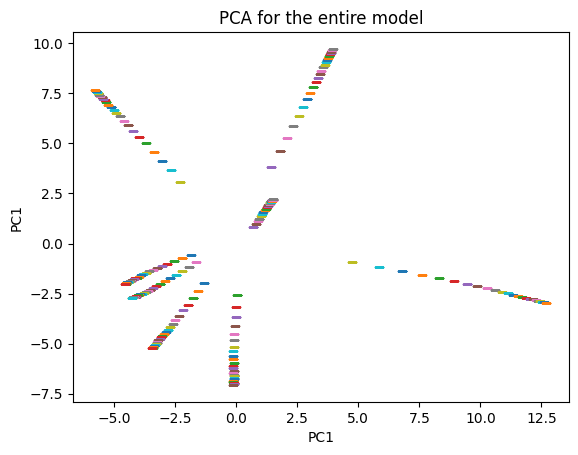

In [ ]:
#Plot pca for entire model
for _, row in final_df.iterrows():
    m = row['Accuracy']
    plt.scatter(row['PC1'], row['PC2'], marker=f'${m}$')

plt.title("PCA for the entire model")
plt.xlabel("PC1")
plt.ylabel("PC1")
plt.show()

In [ ]:
## PCA for layer 1
l1_df = all_df.iloc[ : , 0:7840]
weight_df1 = l1_df
weight_df1 = np.array(weight_df1)
pca = PCA(n_components=2)
new_data = pca.fit_transform(weight_df1)
weight_df1 = pd.DataFrame(new_data, columns=['PC1','PC2'])
weight_df1['Accuracy'] = loss_train
weight_df1['Loss'] = acc_train
final_df1 = weight_df1

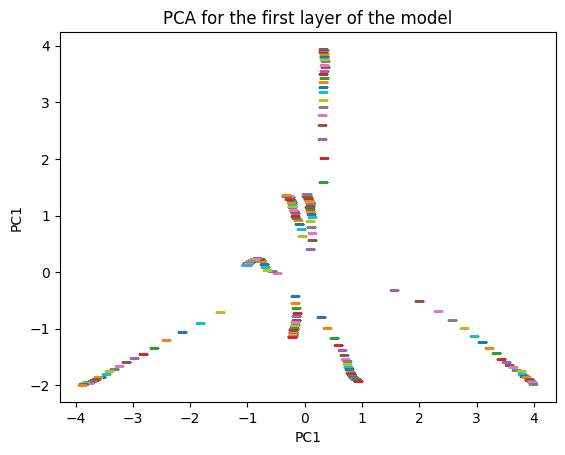

In [ ]:
#Plot pca for first layer of the model
for _, row in final_df1.iterrows():
    m = row['Accuracy']
    plt.scatter(row['PC1'], row['PC2'], marker=f'${m}$')

plt.title("PCA for the first layer of the model")
plt.xlabel("PC1")
plt.ylabel("PC1")
plt.show()